In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!tree --filelimit=30

. [14 entries exceeds filelimit, not opening dir]

0 directories, 0 files


# Importation of data #

In [3]:
features_PumpItUp = pd.read_csv("training_set.csv")
labels_PumpItUp  = pd.read_csv("training_set_labels.csv")
features_submission_PumpItUp = pd.read_csv("submission_set_features.csv")

# training data preparation #

In [4]:
features_PumpItUp.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
print("data size = {0}\n".format(features_PumpItUp.size))
print(features_PumpItUp.columns)

data size = 2376000

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')


In [6]:
labels_PumpItUp.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


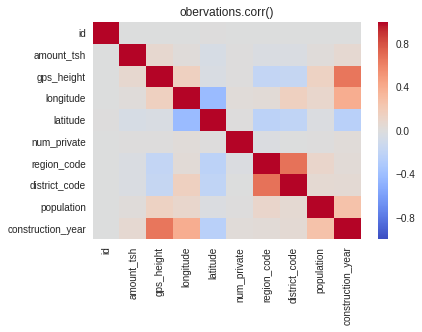

In [7]:
sns.heatmap(features_PumpItUp.corr(),cmap='coolwarm')
plt.title('obervations.corr()')

In [8]:
data_PumpItUp = pd.concat([features_PumpItUp, labels_PumpItUp["status_group"]], axis=1)

In [9]:
data_PumpItUp.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [10]:
print("data size = {0}\n".format(data_PumpItUp.size))
print(data_PumpItUp.columns)

data size = 2435400

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')


In [1]:
plt.scatter(data_PumpItUp['longitude'], data_PumpItUp['latitude'], c=data_PumpItUp['gps_height'])

NameError: name 'plt' is not defined

In [13]:
data_PumpItUp.drop(['date_recorded', 'funder', 'gps_height', 'installer','longitude','latitude','wpt_name',
           'num_private','basin','subvillage','region','region_code','district_code','lga','ward','public_meeting', 'recorded_by',
        'scheme_management','scheme_name', 'quality_group', 'quantity_group','extraction_type_group','extraction_type_class'], axis=1, inplace=True)

In [14]:
data_PumpItUp.columns

Index(['id', 'amount_tsh', 'population', 'permit', 'construction_year',
       'extraction_type', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [15]:
data_PumpItUp.head()

,id,amount_tsh,population,permit,construction_year,extraction_type,management,management_group,payment,payment_type,water_quality,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,109,False,1999,gravity,vwc,user-group,pay annually,annually,soft,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,280,True,2010,gravity,wug,user-group,never pay,never pay,soft,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,250,True,2009,gravity,vwc,user-group,pay per bucket,per bucket,soft,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,58,True,1986,submersible,vwc,user-group,never pay,never pay,soft,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,0,True,0,gravity,other,other,never pay,never pay,soft,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [16]:
import numpy
from sklearn.feature_extraction import DictVectorizer


def one_hot_dataframe(data, cols, replace=False):
    """ Takes a dataframe and a list of columns that need to be encoded.
        Returns a 3-tuple comprising the data, the vectorized data,
        and the fitted vectorizor.
    """
    vec = DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names()
    vecData.index = data.index
    if replace is True:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData, vec)


In [17]:
data_PumpItUp, _, _ = one_hot_dataframe(data_PumpItUp, ['permit', 'extraction_type','management','management_group',
                                                        'source','source_type','source_class','waterpoint_type','waterpoint_type_group',
                                                        'payment', 'payment_type','water_quality','quantity']
                                        , replace=True)

In [18]:
data_PumpItUp.head()

,id,amount_tsh,population,construction_year,status_group,extraction_type=afridev,extraction_type=cemo,extraction_type=climax,extraction_type=gravity,extraction_type=india mark ii,...,waterpoint_type=dam,waterpoint_type=hand pump,waterpoint_type=improved spring,waterpoint_type=other,waterpoint_type_group=cattle trough,waterpoint_type_group=communal standpipe,waterpoint_type_group=dam,waterpoint_type_group=hand pump,waterpoint_type_group=improved spring,waterpoint_type_group=other
0,69572,6000.0,109,1999,functional,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,8776,0.0,280,2010,functional,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,34310,25.0,250,2009,functional,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,67743,0.0,58,1986,non functional,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,19728,0.0,0,0,functional,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
data_PumpItUp.shape

(59400, 101)

The feature **'extraction_type=other - mkulima/shinyanga'** is removed since it is not present in the submission data. If it is not removed, the number of features for the trained model and the submission data will not be the same. The problem can be solve otherwise by first merging all the data before the treatment.

In [20]:
data_PumpItUp = data_PumpItUp.loc[data_PumpItUp['extraction_type=other - mkulima/shinyanga'] ==0.0].drop(['extraction_type=other - mkulima/shinyanga'], axis=1)

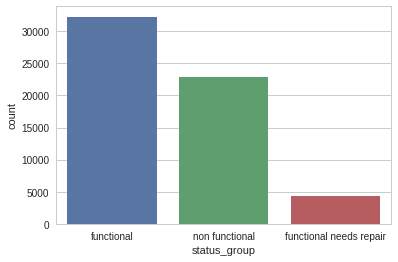

In [22]:
ax = sns.countplot(x="status_group", data=data_PumpItUp)

In [24]:
data_PumpItUp.to_csv("training_data_for_benchmark.csv",index=False,index_label=False)

# Data for submission #

In [25]:
features_submission_PumpItUp.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [26]:
features_submission_PumpItUp_forPrediction = features_submission_PumpItUp.drop(['date_recorded', 'funder', 'gps_height', 'installer','longitude','latitude','wpt_name',
           'num_private','basin','subvillage','region','region_code','district_code','lga','ward','public_meeting', 'recorded_by',
        'scheme_management','scheme_name', 'quality_group', 'quantity_group','extraction_type_group','extraction_type_class'], axis=1)

In [27]:
features_submission_PumpItUp_forPrediction, _, _ = one_hot_dataframe(features_submission_PumpItUp_forPrediction, ['permit', 'extraction_type','management','management_group',
                                                        'source','source_type','source_class','waterpoint_type','waterpoint_type_group',
                                                        'payment', 'payment_type','water_quality','quantity']
                                        , replace=True)

In [28]:
X_submission = features_submission_PumpItUp_forPrediction.drop(["id"],axis=1)
X_submission = X_submission.fillna(X_submission.mean())

In [29]:
X_submission.to_csv("features_submission_prepared_for_benchmark.csv",index=False,index_label=False)